### 따라 하며 배우는 데이터 과학 - 파이썬 편 3 - 데이터 시각화

본 장은 ["따라 하며 배우는 데이터 과학"](https://dataninja.me/ipds-kr/) 4장의 
"데이터 시각화 I: ggplot2" 내용의 파이썬 버전입니다.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 4.2. 예제 데이터 (gapminder, diamonds, mpg)

#### Data Sources:
- `data/gapminder.tsv` : https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv

Other data are exported from R via:
```r
> library(tidyverse)
> diamonds %>% write_tsv("../notebooks/data/diamonds.tsv")
> mpg %>% write_tsv("../notebooks/data/mpg.tsv")
```

In [2]:
gapminder = pd.read_csv("data/gapminder.tsv", sep="\t")
print gapminder.shape
gapminder.head()

(1704, 6)


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
diamonds = pd.read_csv("data/diamonds.tsv", sep="\t")
print diamonds.shape
diamonds.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
mpg = pd.read_csv("data/mpg.tsv", sep="\t")
print mpg.shape
mpg.head()

(234, 11)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### 그림 4.3

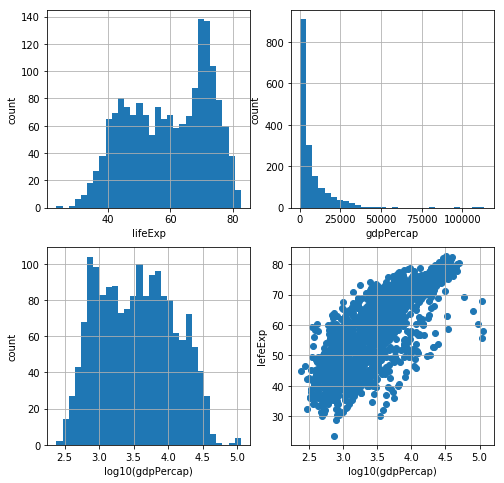

In [5]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
gapminder.lifeExp.hist(ax=ax1, bins=30)
ax1.set_xlabel('lifeExp')
ax1.set_ylabel('count')
gapminder.gdpPercap.hist(ax=ax2, bins=30)
ax2.set_xlabel('gdpPercap')
ax2.set_ylabel('count')
np.log10(gapminder.gdpPercap).hist(ax=ax3, bins=30)
ax3.set_xlabel('log10(gdpPercap)')
ax3.set_ylabel('count')
ax4.scatter(x=np.log10(gapminder.gdpPercap), y=gapminder.lifeExp)
ax4.set_xlabel('log10(gdpPercap)')
ax4.set_ylabel('lefeExp')
ax4.grid()
# TODO: add smoothed curve
plt.show()

## 4.3 변수의 종류에 따른 시각화 기법

### 4.3.1. 한 수량형 변수

#### 그림 4-4

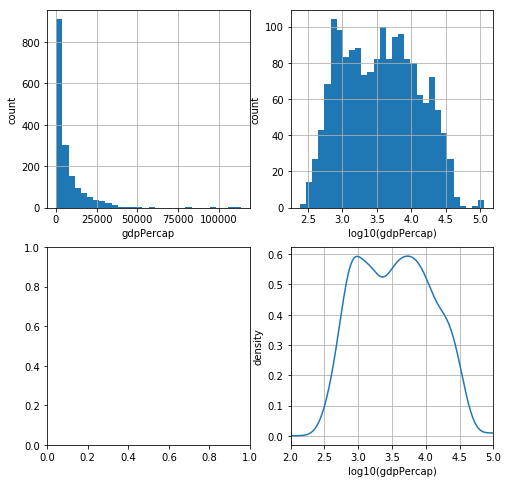

In [6]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
gapminder.gdpPercap.hist(ax=ax1, bins=30)
ax1.set_xlabel('gdpPercap')
ax1.set_ylabel('count')

np.log10(gapminder.gdpPercap).hist(ax=ax2, bins=30)
ax2.set_xlabel('log10(gdpPercap)')
ax2.set_ylabel('count')

# No freqpoly in matplotlib
np.log10(gapminder.gdpPercap).plot.density(ax=ax4)
ax4.set_xlabel('log10(gdpPercap)')
ax4.set_ylabel('density')
ax4.set_xlim(2, 5.0)
# ... since default xlim is too wide
ax4.grid(True)
# ... since default doesn't have grid lines

### 4.3.2 한 범주형 변수

#### 그림 4-5

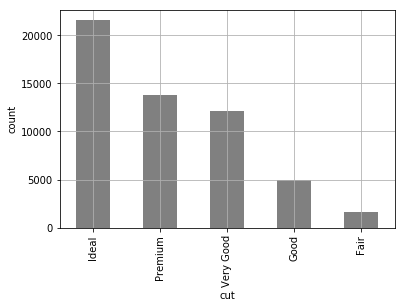

In [7]:
x = diamonds.cut.value_counts()
plt.figure()
x.plot.bar(color='gray')
# ... diamonds.cut.plot.bar() doesn't work, since Series.plot.bar() doesn't do frequency calc.
# ... without color= argument, each level is shown in different colors
plt.grid(True)
plt.xlabel("cut")
plt.ylabel("count")
plt.show()
# ... since default doesn't have grid lines

### 4.3.3 두 수량형 변수

#### 그림 4-6

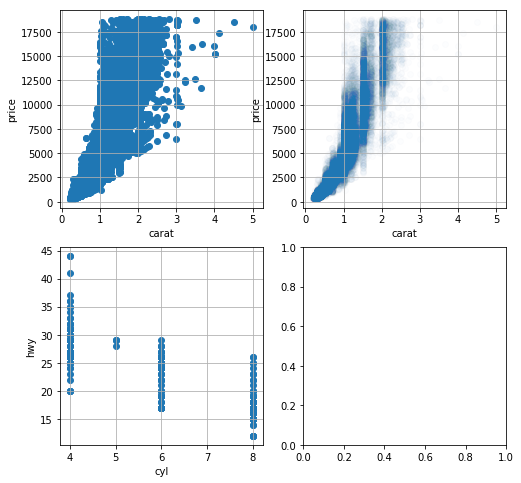

In [8]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
ax1.scatter(diamonds.carat, diamonds.price)
ax1.grid(True)
ax1.set_xlabel("carat")
ax1.set_ylabel("price")
ax2.scatter(diamonds.carat, diamonds.price, alpha=.01)
ax2.grid(True)
ax2.set_xlabel("carat")
ax2.set_ylabel("price")
ax3.scatter(mpg.cyl, mpg.hwy)
ax3.grid(True)
ax3.set_xlabel("cyl")
ax3.set_ylabel("hwy")
plt.show()
# TODO: add Jittered plot

#### 그림 4-7

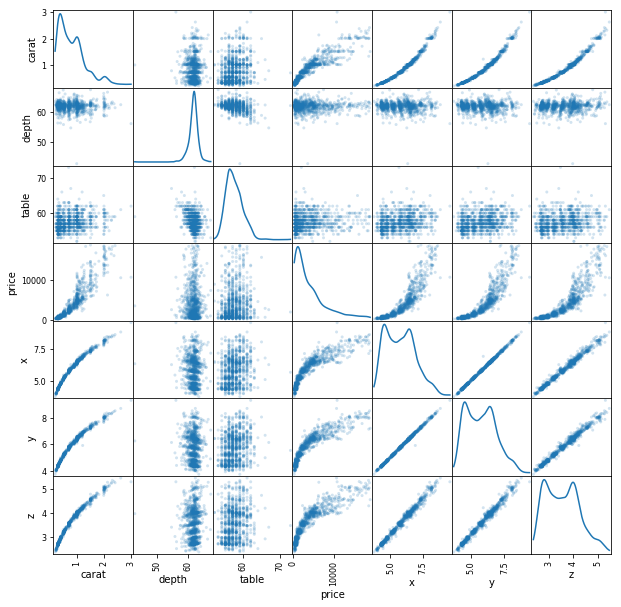

In [9]:
from pandas.plotting import scatter_matrix
df = diamonds.sample(n=1000)
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()
# TODO: R `pairs()` shows all variables, including cut, color, clarity ; compare

### 4.3.4 수량형 변수와 범주형 변수

#### 그림 4-8

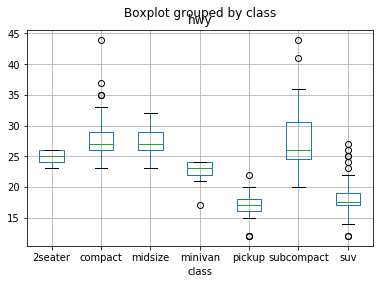

In [10]:
mpg.boxplot("hwy", by="class")
plt.show()

#### 그림 4-9

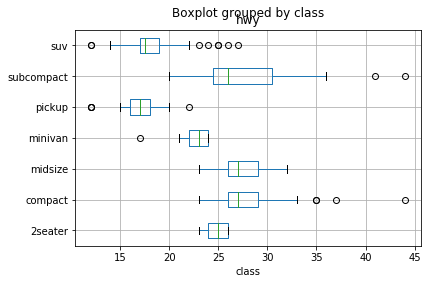

In [11]:
mpg.boxplot("hwy", by="class", vert=False)
plt.show()

### 4.3.5 두 범주형 변수

#### 그림 4-10 타이타닉 생존자 데이터의 모자익 플롯

TBA

#### 그림 4-11 2007년 국가별 평균 소득과 기대 수명 간의 관계

TBA

#### 그림 4-12 평균 기대 수명의 연도별 추세

TBA

## 연습문제:

1. Seaborn <https://seaborn.pydata.org/> 을 사용하여 본서의 그림을 작성해 보라.
1. 책 (90페이지) 에 있는 연습문제 1번 (IMDB 영화 데이터 시각화)을 파이썬을 사용하여 풀어 보라.
1. 책 (90페이지) 에 있는 연습문제 2번 (포켓몬 데이터 시각화)을 파이썬을 사용하여 풀어 보라.